<a href="https://colab.research.google.com/github/HarshitaBansal17/RFM_ANALYSIS/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sprocket Central Pty Ltd** , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team.

Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy.

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

# **The client provided KPMG with 3 datasets:**


-  Customer Demographic


- Customer Addresses


- Transactions data in the past 3 months

# **Importing all the library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Importing and reading the excel**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/kpmg.xlsx')

# **Working on Transaction Dataset**

In [ ]:
Transactions=pd.read_excel('/content/drive/MyDrive/kpmg.xlsx',sheet_name = 1)


In [ ]:
Transactions.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

# **Looking at the dimensionality**

In [ ]:
Transactions.shape

(20000, 13)

# **Looking at the info**

In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n




# **Looking at the missing values**

In [ ]:
Transactions.isna().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# **Imputation of missing values**

In [ ]:
Transactions["online_order"].fillna("na",inplace=True)
Transactions["brand"].fillna("not known",inplace=True)
Transactions["product_line"].fillna("not known",inplace=True)
Transactions["product_class"].fillna("not known",inplace=True)
Transactions["product_size"].fillna("not known",inplace=True)
Transactions["standard_cost"].fillna(Transactions["standard_cost"].mean(),inplace=True)
Transactions["product_first_sold_date"].fillna("0",inplace=True)

In [ ]:
Transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [ ]:
Transactions.duplicated().sum()

0

***There are no duplicate values, all the data is unique***





# **Recasting the Data type**

In [ ]:
Transactions=Transactions.astype({"transaction_id":"int64",
 "product_id":"int64",
 "customer_id":"int64",
 "list_price":"int64",
 "standard_cost":"int64",





})

In [ ]:
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])


In [ ]:
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71,53,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793,248,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198,381,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765,709,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005,1203,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416,312,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636,44,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227,136,38216.0


In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  int64         
 11  standard_cost            20000 non-null  int64         
 12  product_first_sold_date  20000 n

# **Looking at the unique values in the Data**

In [ ]:
Transactions.nunique()


transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   3
order_status                   2
brand                          7
product_line                   5
product_class                  4
product_size                   4
list_price                   274
standard_cost                 97
product_first_sold_date      101
dtype: int64



# **Exploring the columns**

In [ ]:

Transactions.columns


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
not known          197
Name: brand, dtype: int64

In [ ]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [ ]:
Transactions['product_line'].value_counts()

Standard     14176
Road          3970
Touring       1234
Mountain       423
not known      197
Name: product_line, dtype: int64

In [ ]:
Transactions['product_class'].value_counts()

medium       13826
high          3013
low           2964
not known      197
Name: product_class, dtype: int64

# **Adding profit and profit% columns**

In [ ]:
# Calculate the profit and profit percentage
Transactions["profit"] = Transactions["list_price"] - Transactions["standard_cost"]
Transactions["profit_percentage"] = (Transactions["list_price"] - Transactions["standard_cost"]) / Transactions["list_price"] * 100


In [ ]:
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,profit_percentage
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71,53,41245.0,18,25.352113
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701.0,1703,81.444285
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793,248,36361.0,1545,86.168433
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198,381,36145.0,817,68.196995
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765,709,42226.0,1056,59.830028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005,1203,37823.0,802,40.000000
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416,312,35560.0,104,25.000000
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636,44,40410.0,1592,97.310513
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227,136,38216.0,91,40.088106


# **Working on Customer Demographic Data**



In [ ]:
cd=pd.read_excel('/content/drive/MyDrive/kpmg.xlsx',sheet_name = 3)

In [ ]:
cd.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


In [ ]:
cd.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [ ]:
cd.shape


(4000, 13)

In [ ]:
cd.duplicated().sum()

0

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

# **unique values**

In [ ]:
cd.nunique()


customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

# **missing values**

In [ ]:
cd.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [ ]:
cd["last_name"].fillna("not_known",inplace=True)
cd["job_title"].fillna("not_known",inplace=True)
cd["job_industry_category"].fillna("not_known",inplace=True)
cd["tenure"].fillna(int(0),inplace=True)


In [ ]:
cd.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                   0
dtype: int64

#***We will delete the Column "default" because of***
#***having non-readable values.***


In [ ]:
cd.drop("default",axis=1,inplace=True)

In [ ]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,not_known,Male,33,1961-10-03,not_known,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,not_known,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,0.0
3998,3999,Patrizius,not_known,Male,11,1973-10-24,not_known,Manufacturing,Affluent Customer,N,Yes,10.0


In [ ]:
cd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

# **Recasting the data types**

In [ ]:
cd['DOB']=pd.to_datetime(cd['DOB'])

In [ ]:
cd=cd.astype({'past_3_years_bike_related_purchases':'int64',
 'tenure':'float64','customer_id':"int64"



 })


In [ ]:
cd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
cd.isnull().sum()

customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
dtype: int64

In [ ]:
cd.dropna(inplace=True)

# **Exploring the columns**

In [ ]:
cd.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [ ]:
cd ['gender'].value_counts()


Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

In [ ]:
cd["gender"]=cd["gender"].str.replace("Femaleemale","Female")


In [ ]:
cd ['gender'].value_counts()

Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

# **Data cleaning**

In [ ]:
cd.drop(cd.index[(cd["gender"] == "F")],axis=0,inplace=True)

In [ ]:
cd.drop(cd.index[(cd["gender"] == "Femal")],axis=0,inplace=True)

In [ ]:
cd.drop(cd.index[(cd["gender"] == "M")],axis=0,inplace=True)

In [ ]:
cd ['gender'].value_counts()

Female    2037
Male      1872
U            1
Name: gender, dtype: int64

In [ ]:
cd["gender"]=cd["gender"].str.replace("U","others")

In [ ]:
cd ['gender'].value_counts()

Female    2037
Male      1872
others       1
Name: gender, dtype: int64

In [ ]:
cd ['job_title'].value_counts()

not_known                               497
Tax Accountant                           43
Business Systems Development Analyst     43
Social Worker                            42
Recruiting Manager                       41
                                       ... 
Database Administrator I                  4
Health Coach I                            3
Health Coach III                          3
Research Assistant III                    3
Developer I                               1
Name: job_title, Length: 196, dtype: int64

In [ ]:
cd ['job_industry_category'].value_counts()

Manufacturing         796
Financial Services    767
not_known             655
Health                595
Retail                358
Property              266
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [ ]:
cd ['wealth_segment'].value_counts()

Mass Customer        1951
High Net Worth        996
Affluent Customer     963
Name: wealth_segment, dtype: int64

# **Adding the Age Column**

In [ ]:
from datetime import datetime,date as dt
cd["year"]=cd["DOB"].dt.year
today=dt.today()
cd.astype({"year":"int64"})
cd["age"]=today.year-cd["year"]
cd.drop("year",axis=1,inplace=True)

In [ ]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,not_known,Male,33,1961-10-03,not_known,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,not_known,Affluent Customer,N,Yes,8.0,46
5,6,Curr,Duckhouse,Male,35,1966-09-16,not_known,Retail,High Net Worth,N,Yes,13.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,48
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,48
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,22
3998,3999,Patrizius,not_known,Male,11,1973-10-24,not_known,Manufacturing,Affluent Customer,N,Yes,10.0,50


# **Working on Customer address dataset**

In [ ]:
ca=pd.read_excel('/content/drive/MyDrive/kpmg.xlsx',sheet_name = 4)

In [ ]:
ca.head()


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
ca.nunique()


customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [ ]:
ca.duplicated().sum()


0

**No duplicates present**

In [ ]:
ca.shape


(3999, 6)

In [ ]:
ca.describe()


,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [ ]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# **checking the Missing values**

In [ ]:
ca.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
ca.isna().sum()


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64




**No missing or na values**

# **Recasting the data types**

In [ ]:
ca=ca.astype({"customer_id":"int64","postcode":"int64","property_valuation":"int64"})

In [ ]:
ca.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB




# **Exploring the columns**

In [ ]:
ca.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [ ]:
ca['address'].value_counts()

3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64

In [ ]:
ca['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

**Changing the names,Victoria to VIC and New
South Wales to NSW**

In [ ]:
ca['state'].replace('New South Wales', 'NSW', inplace=True)
ca['state'].replace('Victoria', 'VIC', inplace=True)
ca.dropna(inplace=True)
ca


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
ca['state'].value_counts()


NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

***Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes***

# **Working on New Customer dataset**

In [ ]:
Ncl=pd.read_excel('/content/drive/MyDrive/kpmg.xlsx',sheet_name = 2)

In [ ]:
Ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.99,1.2375,1.546875,1.314844,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.46,0.4600,0.575000,0.488750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.44,0.4400,0.440000,0.440000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.83,1.0375,1.037500,1.037500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.05,1.0500,1.312500,1.312500,4,4,1.703125


In [ ]:
Ncl.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

# **Dropping unknown columns**

In [ ]:
Ncl.drop(Ncl.columns[[16,17,18,19,20]], axis=1, inplace=True)

In [ ]:
Ncl.shape

(1000, 18)

In [ ]:
Ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:

Ncl.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

# **Checking the missing values**

In [ ]:
Ncl.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

# **Imputting the missing values**

In [ ]:
Ncl["last_name"].fillna("Not known",inplace=True)
Ncl["job_title"].fillna("Not known",inplace=True)
Ncl["job_industry_category"].fillna("Not known",inplace=True)

In [ ]:
Ncl.isnull().sum()


first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Rank                                    0
Value                                   0
dtype: int64

In [ ]:
Ncl['DOB']= pd.to_datetime(Ncl["DOB"])
Ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

# **Recasting the datatype**

In [ ]:
Ncl=Ncl.astype({"past_3_years_bike_related_purchases":"int64",
 "tenure":"int64",
 "postcode":"int64",
 "property_valuation":"int64",
 "Value":"float64" ,
 "Rank":"int64",


 })

In [ ]:
Ncl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
Ncl.duplicated().sum()


0

 **No duplicated values found.**


# **Exploring the columns**

In [ ]:
Ncl['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [ ]:
Ncl["gender"]=Ncl["gender"].str.replace("U","others")


In [ ]:
Ncl['gender'].value_counts()

Female    513
Male      470
others     17
Name: gender, dtype: int64

In [ ]:
Ncl.dropna(inplace=True)

In [ ]:
from datetime import datetime,date as dt
Ncl['Year'] = Ncl['DOB'].dt.year
today=dt.today()
today.year

2023

In [ ]:
Ncl.astype({"Year":"int64"})
Ncl["age"]=today.year-Ncl["Year"]

In [ ]:
Ncl


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Year,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1957,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1970,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,1974,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,1979,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,1965,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,1959,64
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,2001,22
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,1954,69
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,1952,71


***Comparing the new customer and old customer
table***

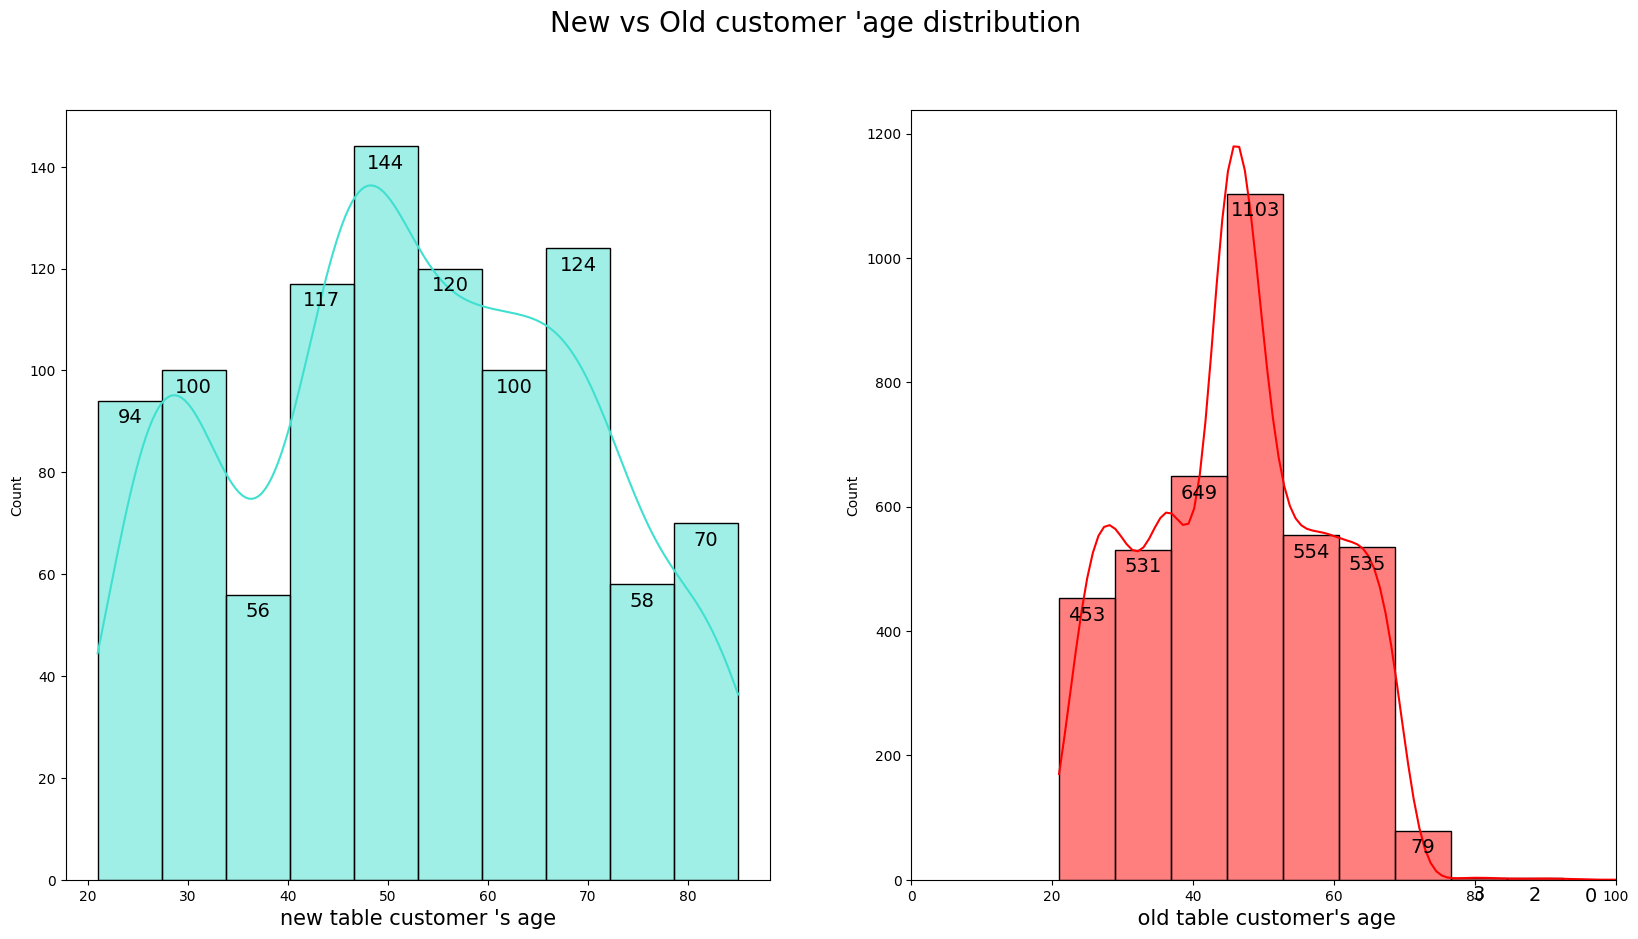

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(121)
c=sns.histplot(data=Ncl,bins=10,x="age",color="turquoise",kde=True)
for i in c.patches:
 c.annotate(format(round(i.get_height()), '.0f'),
 (i.get_x() + i.get_width() / 2., i.get_height()),
 ha='center', va='center',color='black',
 size=14,
 xytext=(0, -12),
 textcoords='offset points')
plt.xlabel("new table customer 's age",fontsize=15)
plt.subplot(122)
d=sns.histplot(data=cd,bins=20,x="age",color="red",kde=True)
for i in d.patches:
 d.annotate(format(round(i.get_height()), '.0f'),
 (i.get_x() + i.get_width() / 2., i.get_height()),
 ha='center', va='center',color='black',
 size=14,
 xytext=(0, -12),
 textcoords='offset points')
plt.xlim(0, 100)
plt.xlabel(" old table customer's age",fontsize=15)
plt. suptitle("New vs Old customer 'age distribution",fontsize=20)
plt.show()

# **ANALYSIS**



1)Most customer’s age is in between 40-49 in new. In old, most of the people ‘s age is also between 40-49.

2)The lowest group
of age in old table is 80-100.

3)The lowest group in “new “ table is 35-40.

 4)There is a steep drop of customers in new table
between 32-39.

 5) Age group from 50-60 are considered most populated in both the tables.


# **Create a pivot table to make further**


In [ ]:
table=pd.pivot_table(data=cd,index="gender",aggfunc="sum").reset_index("gender")
table

,gender,age,customer_id,past_3_years_bike_related_purchases,tenure
0,Female,93693,4130807,98264,21708.0
1,Male,85843,3692409,93396,19931.0
2,others,180,34,59,20.0


Text(0.5, 1.0, 'pie chart')

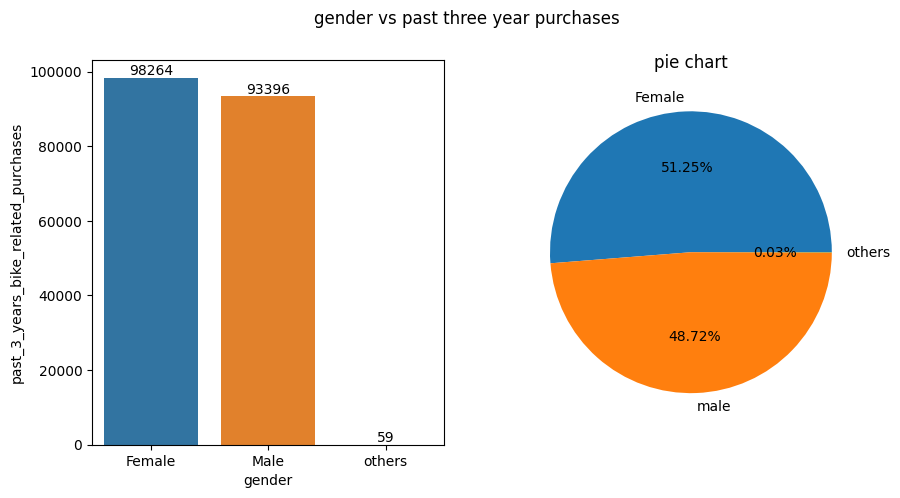

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
d=sns.barplot(data=table,x="gender",y="past_3_years_bike_related_purchases")
for i in d.patches:
 d.annotate(format(round(i.get_height()), '.0f'),
 (i.get_x() + i.get_width() / 2., i.get_height()),
 ha='center', va='center',color="black",
 size=10,
 xytext=(0, 5),
 textcoords='offset points')
plt.subplot(122)
plt.pie(data=table, x="past_3_years_bike_related_purchases",autopct='%.2f%%',labels=["Female","male","others"])
plt.suptitle("gender vs past three year purchases")
plt.title("pie chart")

# **Job distribution in old vs New table**


In [ ]:
data=Ncl["job_industry_category"].value_counts()

In [ ]:
data


Financial Services    202
Manufacturing         199
Not known             165
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

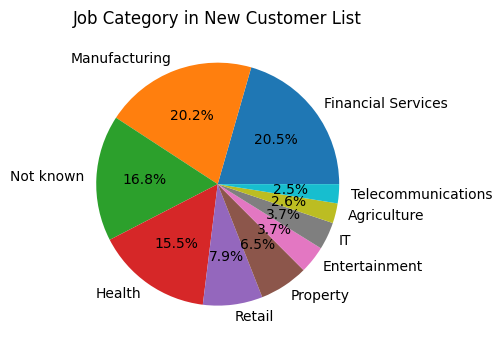

In [ ]:
import matplotlib.pyplot as plt

keys = [202, 199, 165, 152, 78, 64, 36, 36, 26, 25]
labels = ["Financial Services", "Manufacturing", "Not known", "Health", "Retail",
          "Property", "Entertainment", "IT", "Agriculture", "Telecommunications"]

plt.figure(figsize=(5, 5))
plt.pie(keys, labels=labels, autopct='%1.1f%%')
plt.title("Job Category in New Customer List")
plt.tight_layout()
plt.show()

In [ ]:
data=cd["job_industry_category"].value_counts()
data

Manufacturing         796
Financial Services    767
not_known             655
Health                595
Retail                358
Property              266
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

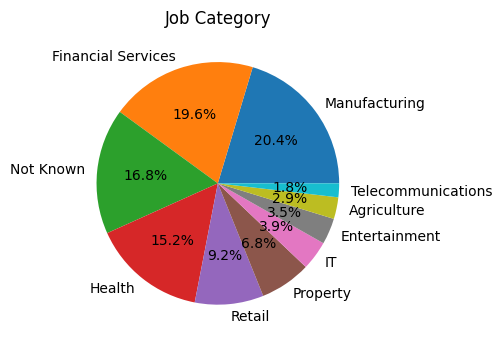

In [ ]:
import matplotlib.pyplot as plt

keys = [796, 767, 655, 595, 358, 266, 152, 136, 113, 72]
labels = ["Manufacturing", "Financial Services", "Not Known", "Health", "Retail",
          "Property", "IT", "Entertainment", "Agriculture", "Telecommunications"]

plt.figure(figsize=(5, 5))
plt.pie(keys, labels=labels, autopct='%1.1f%%')
plt.title("Job Category")
plt.tight_layout()
plt.show()


# **ANALYSIS**


1)20.55% of new customers are involved in Financial services which is the highest in new table.

 2)Agriculture and Telecommunications are lowest in new customer table. 17% of jobs are still unidentified.

 3)Similar pattern obtained as of new list, here, the manufacturing consist of 20.36% and Financial services consist of 19.62%.


In [ ]:
data=Ncl.groupby("wealth_segment").sum().reset_index()

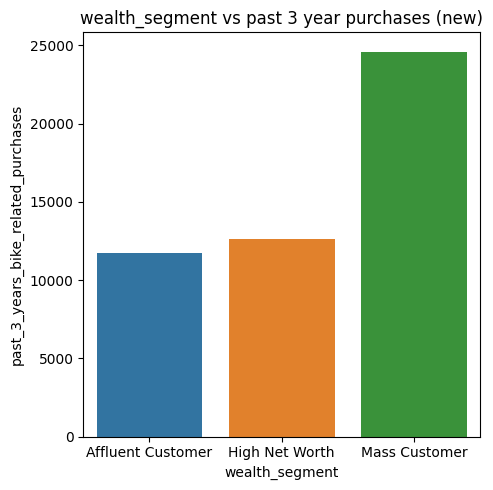

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=data,x='wealth_segment',y='past_3_years_bike_related_purchases')
plt.title('wealth_segment vs past 3 year purchases (new)')
plt.tight_layout()

In [ ]:
data=cd.groupby("wealth_segment").sum().reset_index()

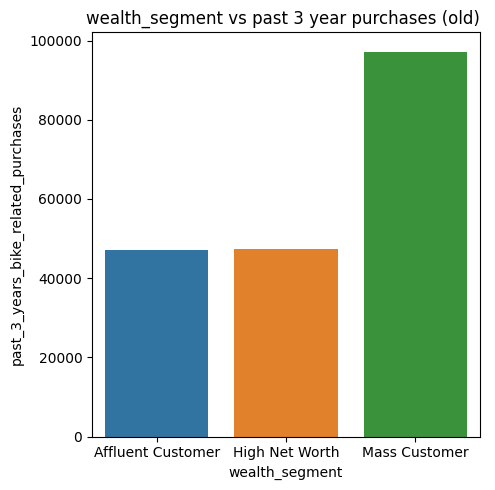

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=data,x='wealth_segment',y='past_3_years_bike_related_purchases')
plt.title('wealth_segment vs past 3 year purchases (old) ')
plt.tight_layout()

# **ANALYSIS**


1)Affluent customers and High net worht customers have similar purchases in last three years in the old data.*italicized text*

2)Mass customer has the highest purchases in last three years.Affluent and high net worth customers some what share same
records.

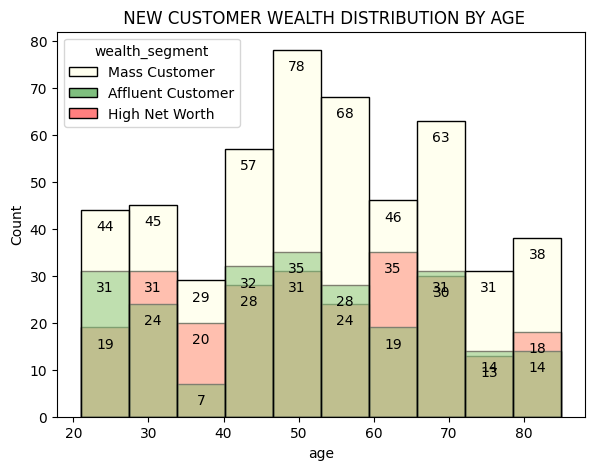

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
c=sns.histplot(data=Ncl,bins=10,x="age",hue="wealth_segment",palette=['lightyellow','green','red'])
for i in c.patches:
 c.annotate(format(round(i.get_height()), '.0f'),
 (i.get_x() + i.get_width() / 2., i.get_height()),
 ha='center', va='center',color='black',
 size=10,
 xytext=(0, -12),
 textcoords='offset points')
plt.title(' NEW CUSTOMER WEALTH DISTRIBUTION BY AGE')
plt.show()

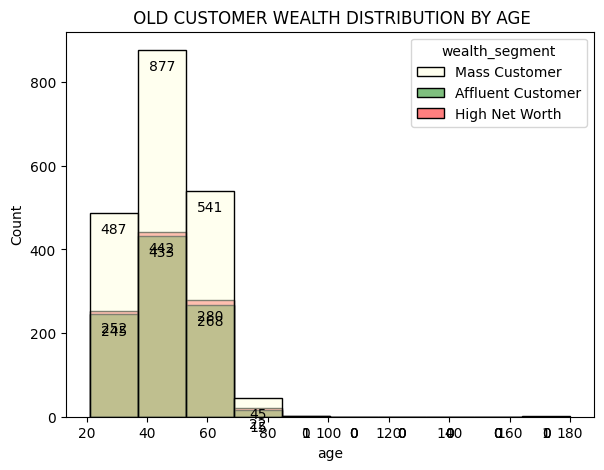

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
c=sns.histplot(data=cd,bins=10,x="age",hue="wealth_segment",palette=['lightyellow','green','red'])
for i in c.patches:
 c.annotate(format(round(i.get_height()), '.0f'),
 (i.get_x() + i.get_width() / 2., i.get_height()),
 ha='center', va='center',color='black',
 size=10,
 xytext=(0, -12),
 textcoords='offset points')
plt.title(' OLD CUSTOMER WEALTH DISTRIBUTION BY AGE')
plt.show()

# **ANALYSIS**

In both the table, mass customers have high purchases and there age is ranging at 45-55.

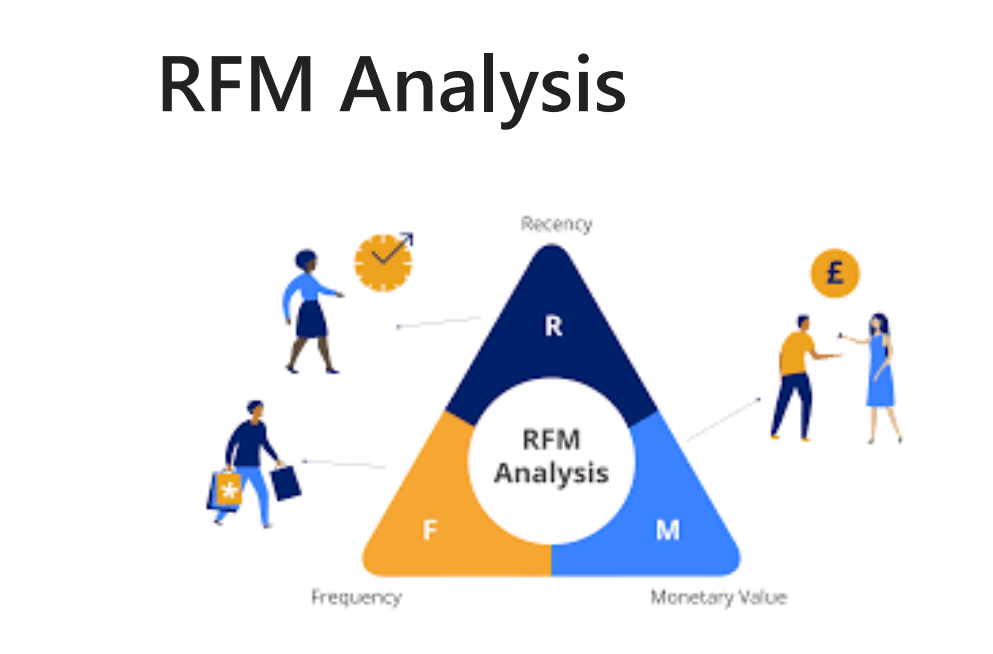





Recency- How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But,
depending on the product, they may measure it in years, weeks or even hours.


Frequency- How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first
time customers may be good targets for follow-up advertising to convert them into more frequent customers.


Monetary- How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money
in the future and have a high value to a business.

# **Creating a new column to know last purchase**

In [ ]:
# Calculate the most recent purchase date
most_recent_purchase = Transactions['transaction_date'].max()

# Calculate the number of days since the last purchase
Transactions['last_purchase_days_ago'] = most_recent_purchase - Transactions['transaction_date']
Transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')

# Display the updated DataFrame
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,profit_percentage,last_purchase_days_ago
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71,53,41245.0,18,25.352113,308.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701.0,1703,81.444285,223.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793,248,36361.0,1545,86.168433,75.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198,381,36145.0,817,68.196995,121.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765,709,42226.0,1056,59.830028,90.0


# **CREATING RFM TABLE**

In [ ]:
rfmTable =Transactions.groupby('customer_id').agg({
 'last_purchase_days_ago': lambda x: x.min(),
 'customer_id': lambda x: len(x),
 'profit': lambda x: x.sum()
})
rfmTable.rename(columns={
 'last_purchase_days_ago': 'recency',
 'customer_id': 'frequency',
 'profit': 'monetary_value'
 }, inplace=True
)


In [ ]:
rfmTable.shape

(3494, 3)

In [ ]:

rfmTable.head()


,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3016
2,128.0,3,2226
3,102.0,8,3363
4,195.0,2,221
5,16.0,6,2394


In [ ]:
df_customer= rfmTable.copy()
df_customer

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3016
2,128.0,3,2226
3,102.0,8,3363
4,195.0,2,221
5,16.0,6,2394
...,...,...,...
3497,52.0,3,1649
3498,127.0,6,3147
3499,51.0,7,4957


In [ ]:
# Reset the index and move 'customer_id' to a column
df_customer.reset_index(drop=False, inplace=True)

df_customer

,customer_id,recency,frequency,monetary_value
0,1,7.0,11,3016
1,2,128.0,3,2226
2,3,102.0,8,3363
3,4,195.0,2,221
4,5,16.0,6,2394
...,...,...,...,...
3489,3497,52.0,3,1649
3490,3498,127.0,6,3147
3491,3499,51.0,7,4957
3492,3500,144.0,6,1787


In [ ]:
# Save the DataFrame as an Excel file
df_customer.to_excel('/content/drive/MyDrive/file.xlsx', index=False)
# Save the DataFrame as an Excel file
Transactions.to_excel('/content/drive/MyDrive/file2.xlsx', index=False)



In [ ]:
rfmTable.describe()

,recency,frequency,monetary_value
count,3494.000000,3494.000000,3494.00000
mean,60.813681,5.724098,3158.65684
std,57.787120,2.325873,1778.75863
min,0.000000,1.000000,15.00000
25%,17.000000,4.000000,1874.00000
50%,44.000000,6.000000,2891.50000
75%,85.000000,7.000000,4240.75000
max,353.000000,14.000000,11668.00000


In [ ]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,17.0,4.0,1874.00
0.50,44.0,6.0,2891.50
0.75,85.0,7.0,4240.75


# **ANALYSIS**

1.

# **Adding normalized rank columns**

In [ ]:
rfmTable['R_rank'] = rfmTable['recency'].rank(ascending=False)
rfmTable['F_rank'] = rfmTable['frequency'].rank(ascending=True)
rfmTable['M_rank'] = rfmTable['monetary_value'].rank(ascending=True)
rfmTable["R_rank_norm"]=(rfmTable['R_rank']/(rfmTable['R_rank'].max()))*100
rfmTable["F_rank_norm"]=(rfmTable['F_rank']/(rfmTable['F_rank'].max()))*100
rfmTable["M_rank_norm"]=(rfmTable['M_rank']/(rfmTable['M_rank'].max()))*100
rfmTable.drop(["R_rank","F_rank","M_rank"],axis=1,inplace=True)
rfmTable

,recency,frequency,monetary_value,R_rank_norm,F_rank_norm,M_rank_norm
customer_id,,,,,,
1,7.0,11,3016,89.988476,97.838534,52.575844
2,128.0,3,2226,12.921348,12.367592,33.714940
3,102.0,8,3363,19.014693,83.395362,59.645106
4,195.0,2,221,3.817344,4.308617,1.516886
5,16.0,6,2394,77.297609,57.171486,37.893532
...,...,...,...,...,...,...
3497,52.0,3,1649,44.281187,12.367592,20.105896
3498,127.0,6,3147,13.065399,57.171486,55.051517
3499,51.0,7,4957,44.929415,72.129974,84.559244


In [ ]:
# Calculate the column-wise average
column_avg = rfmTable.mean()

print("Column-wise averages:")
print(column_avg)


Column-wise averages:
recency             60.813681
frequency            5.724098
monetary_value    3158.656840
R_rank_norm         50.345475
F_rank_norm         50.029001
M_rank_norm         50.014299
RFM_Score            2.503454
dtype: float64


# **FINDINGS**


RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our
customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency
score + 0.57 *Monetary score

In [ ]:
rfmTable['RFM_Score'] = 0.15*rfmTable['R_rank_norm']+0.28 * \
 rfmTable['F_rank_norm']+0.57*rfmTable['M_rank_norm']
rfmTable['RFM_Score'] *= 0.05
rfmTable= rfmTable.round(2)
rfmTable.shape
rfmTable.reset_index("customer_id")
rfmTable.head()

,recency,frequency,monetary_value,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
customer_id,,,,,,,
1,7.0,11,3016,89.99,97.84,52.58,3.54
2,128.0,3,2226,12.92,12.37,33.71,1.23
3,102.0,8,3363,19.01,83.40,59.65,3.01
4,195.0,2,221,3.82,4.31,1.52,0.13
5,16.0,6,2394,77.30,57.17,37.89,2.46


# **Dividing the customers into categories** :-
Top Customer

High value customer

Medium Value Customer

Low value cutomer


Lost customer

In [ ]:

rfmTable["Customer_segment"] = np.where(rfmTable['RFM_Score'] >
 4.5, "Top Customers",
                  (np.where(
 rfmTable['RFM_Score'] > 4,
 "High value Customer",
(np.where(
 rfmTable['RFM_Score'] > 3,
 "Medium Value Customer",
np.where(rfmTable['RFM_Score'] > 1.6,
 'Low Value Customers', 'Lost Customers'))))))
rfmTable[['RFM_Score', 'Customer_segment']].head(20)


,RFM_Score,Customer_segment
customer_id,,
1,3.54,Medium Value Customer
2,1.23,Lost Customers
3,3.01,Medium Value Customer
4,0.13,Lost Customers
5,2.46,Low Value Customers
6,2.86,Low Value Customers
7,0.23,Lost Customers
8,4.63,Top Customers
9,2.07,Low Value Customers


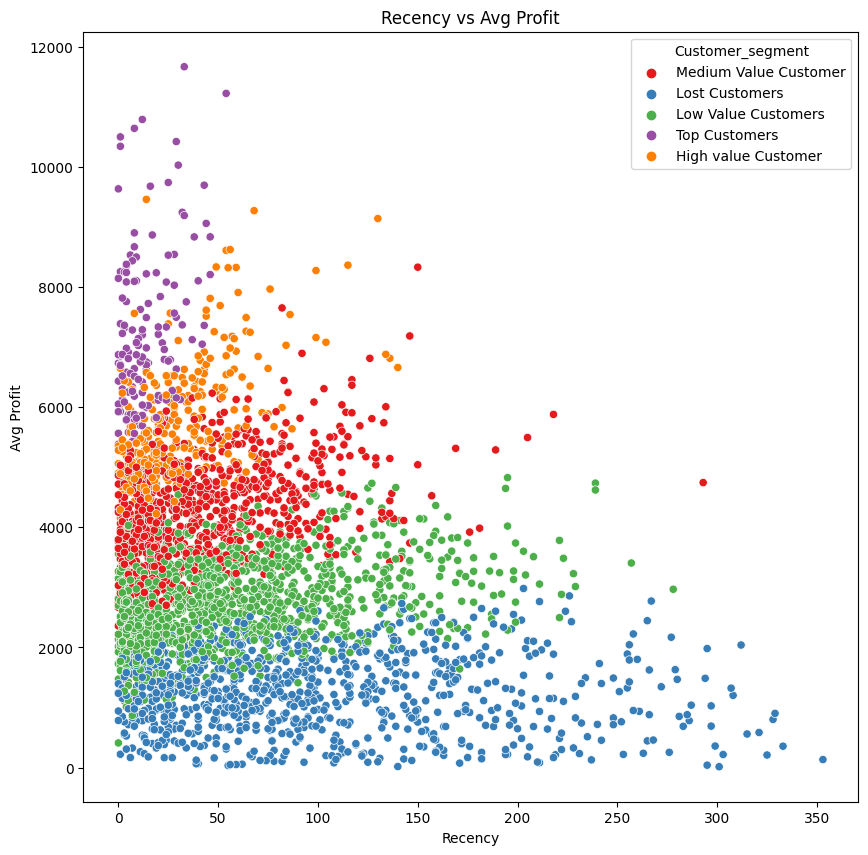

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=rfmTable, x='recency', y='monetary_value', hue="Customer_segment", palette="Set1")
plt.title('Recency vs Avg Profit')
plt.xlabel("Recency")
plt.ylabel('Avg Profit')
plt.show()



In [ ]:
data = Transactions.groupby("product_class").sum().reset_index("product_class")
data['profit_percentage'] = (100 * data['profit_percentage']) / data['profit_percentage'].sum()

data


,product_class,transaction_id,product_id,customer_id,list_price,standard_cost,profit,profit_percentage,last_purchase_days_ago
0,high,30530037,120232,5236135,3287856,2171944,1115912,12.530300,548524.0
1,low,29355828,140918,5189023,2748093,1542882,1205211,12.503914,540375.0
2,medium,138024914,646143,24018100,15895665,7285718,8609947,75.758447,2502310.0
3,not known,2099221,0,321663,214809,109532,105277,-0.792661,37012.0


Text(0.5, 1.0, 'product_class v/s profit % ')

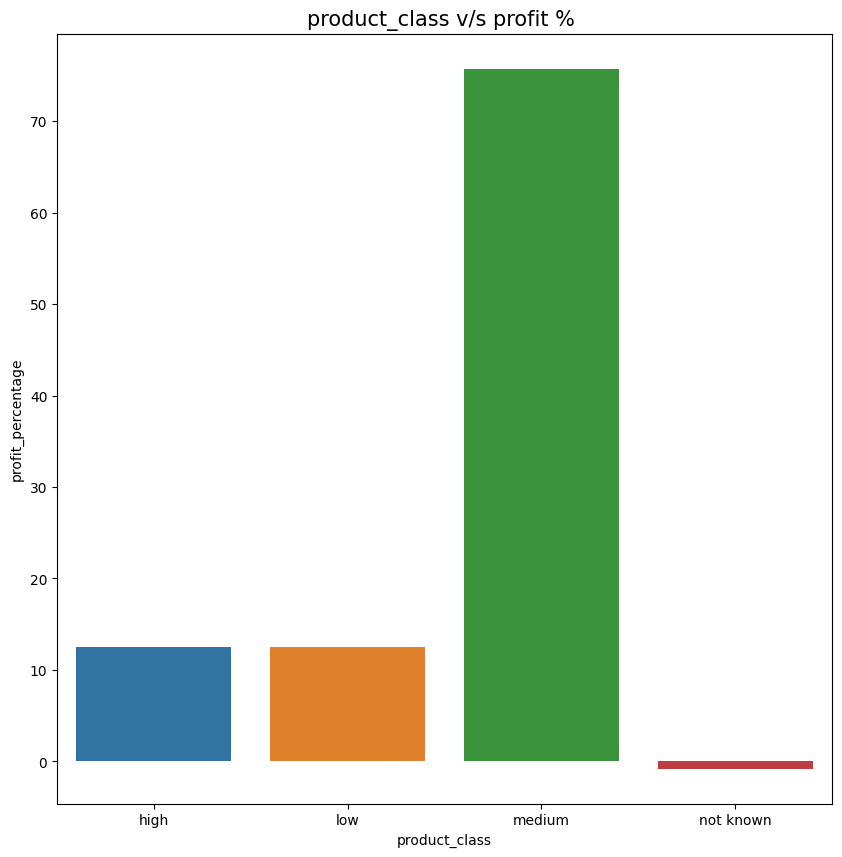

In [ ]:
plt.figure(figsize=(10,10))
c=sns.barplot(data=data,x='product_class',y="profit_percentage")
plt.title("product_class v/s profit % ",fontsize=15)

# **ANALYSIS**


We can see that about 85 % of profit is been generated by the medium product_class. Somewhat 0.30% data is unknown. 10%
profit is also obtained from the low product_class. Our target audience is basically who purchases the medium class product.


# **Merging the rfm Table and Old Customers Demograpthic Table**



In [ ]:
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,not_known,Male,33,1961-10-03,not_known,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,not_known,Affluent Customer,N,Yes,8.0,46
5,6,Curr,Duckhouse,Male,35,1966-09-16,not_known,Retail,High Net Worth,N,Yes,13.0,57


In [ ]:
data=pd.merge(cd,rfmTable,on="customer_id",how="inner")
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,age,recency,frequency,monetary_value,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,43,128.0,3,2226,12.92,12.37,33.71,1.23,Lost Customers
1,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,15.0,69,102.0,8,3363,19.01,83.40,59.65,3.01,Medium Value Customer
2,4,Talbot,not_known,Male,33,1961-10-03,not_known,IT,Mass Customer,N,...,7.0,62,195.0,2,221,3.82,4.31,1.52,0.13,Lost Customers
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,not_known,Affluent Customer,N,...,8.0,46,16.0,6,2394,77.30,57.17,37.89,2.46,Low Value Customers
4,6,Curr,Duckhouse,Male,35,1966-09-16,not_known,Retail,High Net Worth,N,...,13.0,57,64.0,5,3946,36.16,40.42,70.86,2.86,Low Value Customers


In [ ]:
data['Customer_segment']=="Top Customers").value_counts()

False    3273
True      141
Name: Customer_segment, dtype: int64

In [ ]:
df=data.groupby("Customer_segment")["job_industry_category"].value_counts()
df1=pd.DataFrame(df)
df2=df1.iloc[40:]
df2.rename(columns={'job_industry_category':"count"},inplace=True)
df2.reset_index("job_industry_category",inplace=True)
df2

,job_industry_category,count
Customer_segment,,
Top Customers,Health,33
Top Customers,Manufacturing,26
Top Customers,Financial Services,24
Top Customers,not_known,23
Top Customers,Retail,14
Top Customers,Property,8
Top Customers,Argiculture,4
Top Customers,IT,4
Top Customers,Entertainment,3


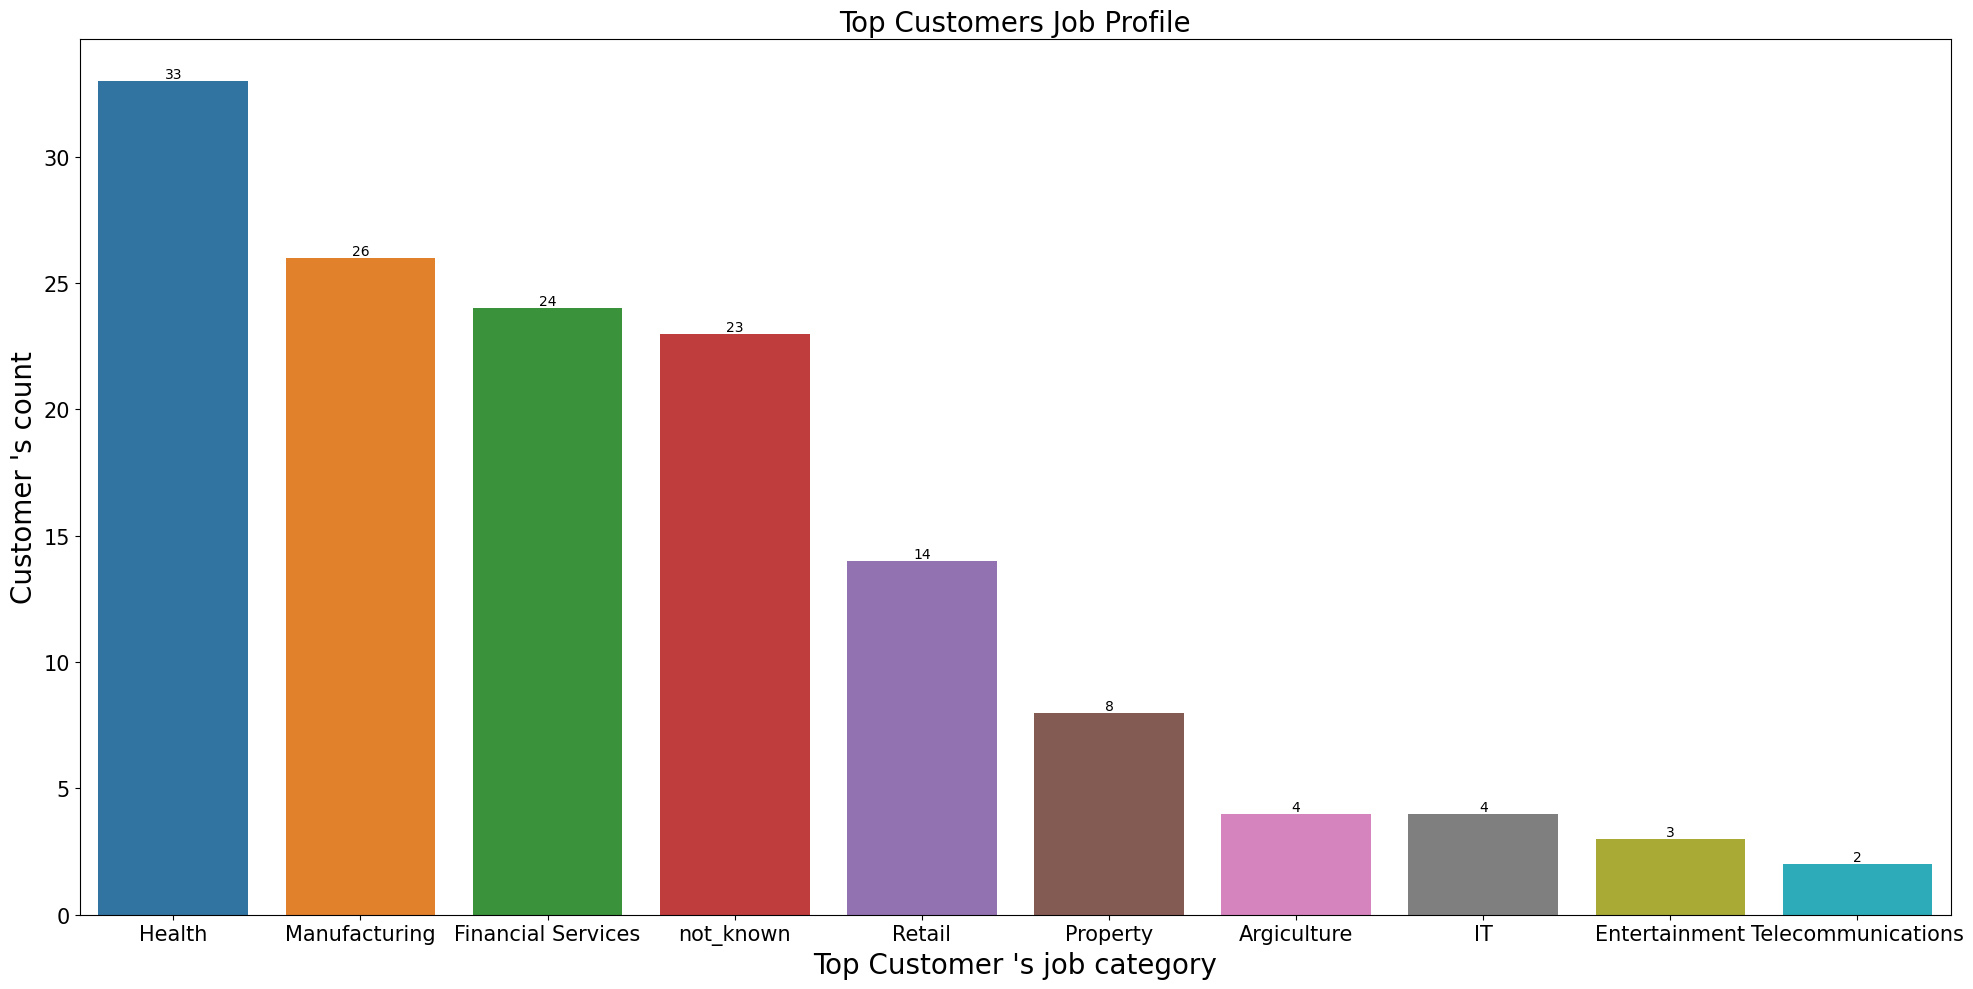

In [ ]:
plt.figure(figsize=(20,10))
d=sns.barplot(data=df2,x="job_industry_category",y="count")
plt.xlabel("Top Customer 's job category",fontsize=20)
for i in d.containers:
 d.bar_label(i,)
plt.ylabel("Customer 's count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top Customers Job Profile",fontsize=20)
plt.tight_layout()

# **ANALYSIS**


Looking from the bar graph we get to know that the most of the top customer belong from the Health and Manufacturing
sector. 23 customers also contribute but they are from unknown profiles.

In [ ]:
df3=df1.iloc[10:20]
df3.rename(columns={'job_industry_category':"count"},inplace=True)
df3.reset_index("job_industry_category",inplace=True)
df3

,job_industry_category,count
Customer_segment,,
Lost Customers,Financial Services,204
Lost Customers,Manufacturing,178
Lost Customers,not_known,141
Lost Customers,Health,139
Lost Customers,Retail,83
Lost Customers,Property,66
Lost Customers,IT,39
Lost Customers,Entertainment,36
Lost Customers,Argiculture,19


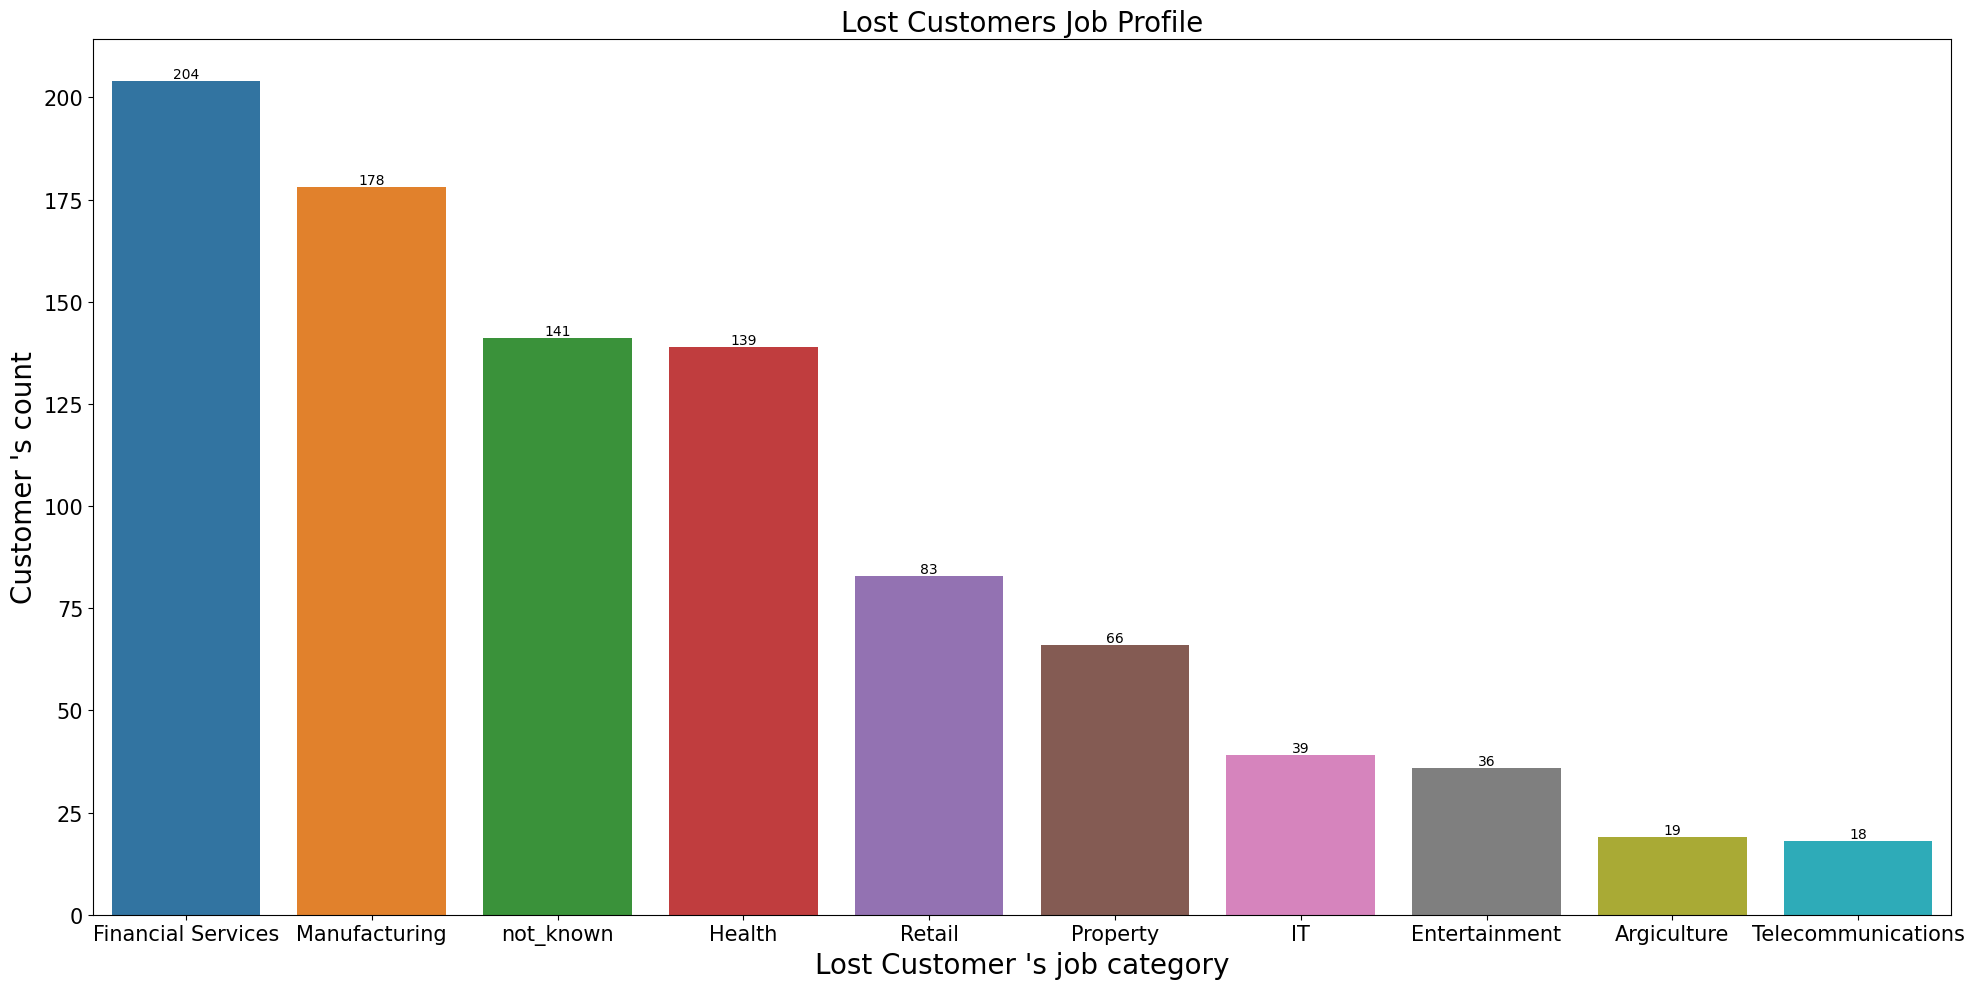

In [ ]:
plt.figure(figsize=(20,10))
d=sns.barplot(data=df3,x="job_industry_category",y="count")
plt.xlabel("Lost Customer 's job category",fontsize=20)
for i in d.containers:
 d.bar_label(i,)
plt.ylabel("Customer 's count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Lost Customers Job Profile",fontsize=20)
plt.tight_layout()

# **ANALYSIS**

The customers that we lost mostly belong from the Financial services background and manufacturing.


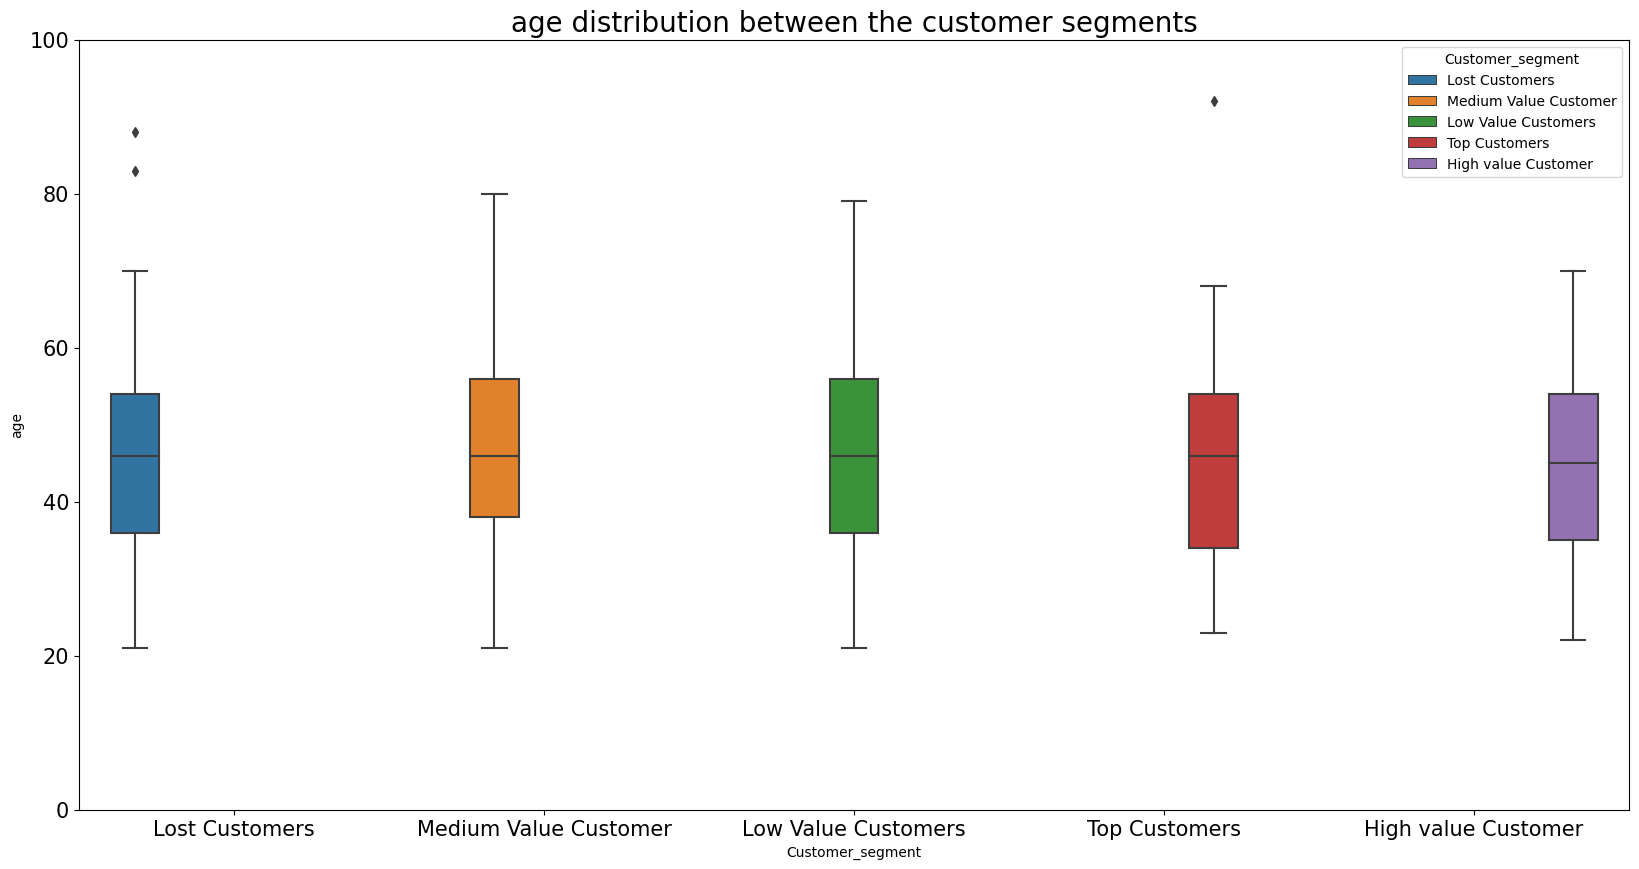

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x="Customer_segment",y="age",hue="Customer_segment")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,100)
plt.title("age distribution between the customer segments",fontsize=20)
plt.show()

# **ANALYSIS**



Most of the age of the customers lie between 40-50. Middle value customers have a high upper limit of approx 80 years.


In [ ]:
df=data.groupby("Customer_segment")["wealth_segment"].value_counts()
df1=pd.DataFrame(df)

df1.rename(columns={'wealth_segment':"count"},inplace=True)
df1.reset_index("wealth_segment",inplace=True)
df1

,wealth_segment,count
Customer_segment,,
High value Customer,Mass Customer,171
High value Customer,High Net Worth,68
High value Customer,Affluent Customer,67
Lost Customers,Mass Customer,475
Lost Customers,Affluent Customer,224
Lost Customers,High Net Worth,224
Low Value Customers,Mass Customer,601
Low Value Customers,High Net Worth,327
Low Value Customers,Affluent Customer,315


In [ ]:
# Reset the index and move 'customer_id' to a column
df1.reset_index(drop=False, inplace=True)

df1

,Customer_segment,wealth_segment,count
0,High value Customer,Mass Customer,171
1,High value Customer,High Net Worth,68
2,High value Customer,Affluent Customer,67
3,Lost Customers,Mass Customer,475
4,Lost Customers,Affluent Customer,224
5,Lost Customers,High Net Worth,224
6,Low Value Customers,Mass Customer,601
7,Low Value Customers,High Net Worth,327
8,Low Value Customers,Affluent Customer,315
9,Medium Value Customer,Mass Customer,385


<Figure size 2000x1000 with 0 Axes>

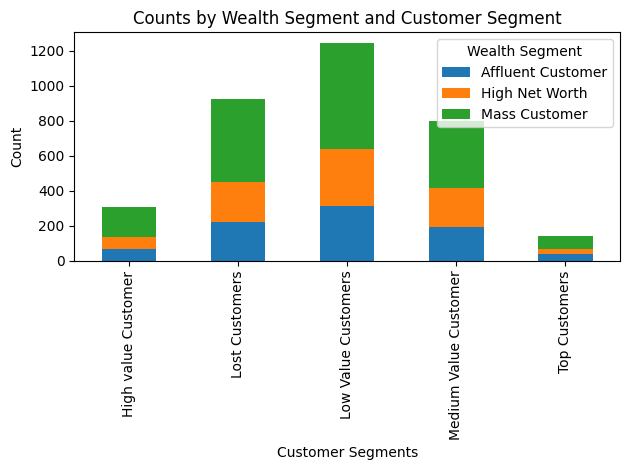

In [ ]:
# Pivot the DataFrame to have wealth_segment as columns and customer_segment as index
pivot_df = df1.pivot(index='Customer_segment', columns='wealth_segment', values='count')


# Plotting the stacked bar chart
plt.figure(figsize=(20, 10))
plot = pivot_df.plot(kind='bar', stacked=True)



plt.xlabel('Customer Segments')
plt.ylabel('Count')
plt.title('Counts by Wealth Segment and Customer Segment')
plt.legend(title='Wealth Segment')
plt.tight_layout()
plt.show()


# **OVERALL ANALYSIS TO TARGET NEW CUSTOMERS**

---



## 1.We can target the customer belonging to job industries like Health,Manufacturing , Retail, Financial service as they are the top market customer to target.


## 2.We can target lost customers who belong too financial services as they are quite high in number. we can insure that no new customer belong to that segment become a lost customer by following ways:


- Provide special incentives or offers exclusively for lost customers in the Financial Services industry.
- Analyze the feedback and reasons provided by lost customers to identify areas of improvement in your products or services.
- Offer educational materials, webinars, or workshops specifically tailored to the Financial Services industry.
- Introduce a loyalty program specifically for customers in the Financial Services industry.


## 3. The primary goal is to increase revenue, targeting the high-value customers might be a good strategy.

## 4.Company can taget a age group between 20-60 as in this more number of top customers and high value customer lies